In [9]:
import lidarpy as ld
import importlib
importlib.reload(ld);
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,10)

import matplotlib.pyplot as plt
import numpy as np

In [10]:
#fname = './points_lrg.las'
fname = 'data/points_fray_farm.laz'
#fname = './USGS_LPC_VA_ChesapeakeBay_2015_LAS_S13_4993_30.laz'
#fname = './USGS_LPC_VA_ChesapeakeBay_2015_LAS_S13_4990_20.laz'
ldr = ld.lidar(fname)

126
164


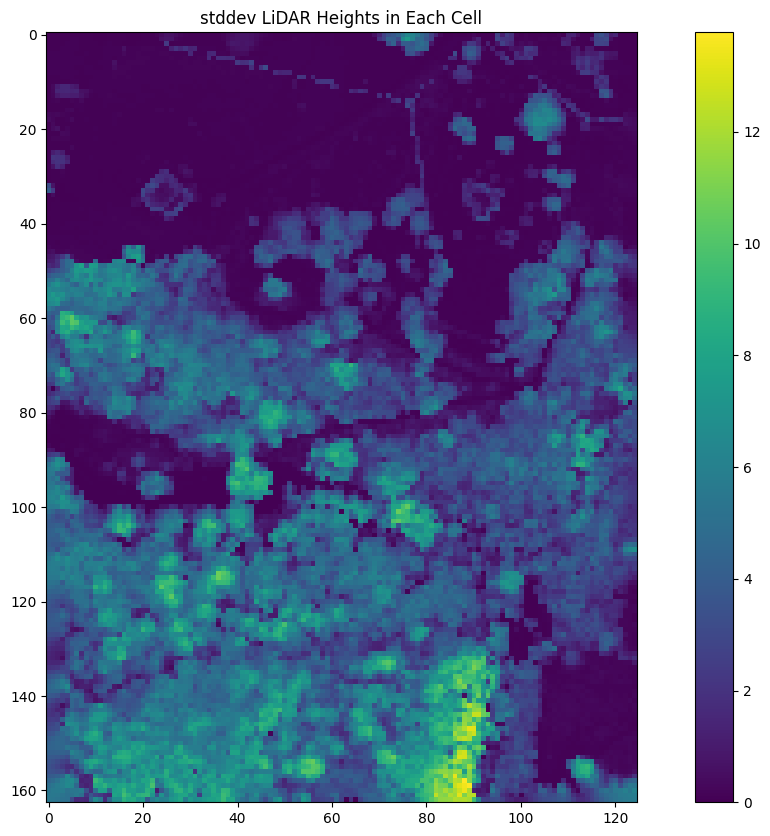

In [11]:
ldr.show_im(3)

In [12]:
ldr.save_png(fname[2:-4])
ldr.save_tiff(fname[2:-4])

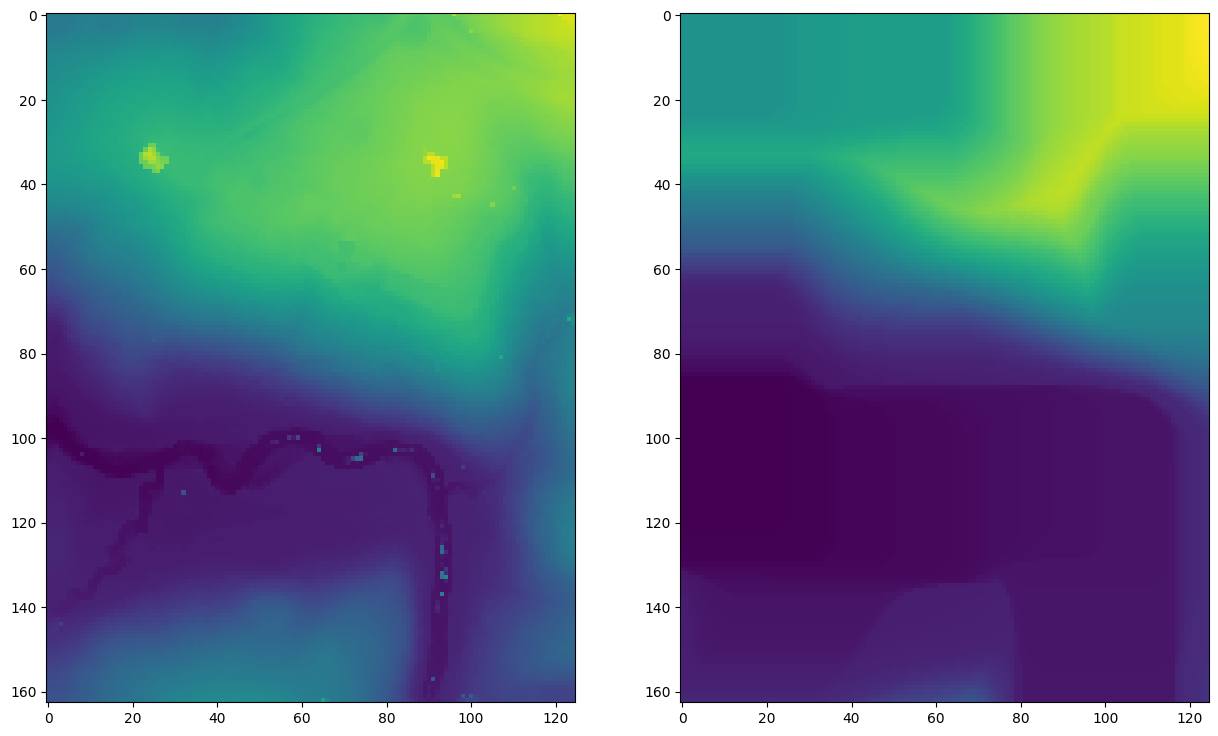

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(ldr.grid_min);
ax2.imshow(ldr.dem);

In [14]:
def stretch(X):
    low = np.percentile(X, 1)
    high = np.percentile(X,99)
    X = (X-low)/(high-low)
    X[X<0] = 0
    X[X>1] = 1
    return X

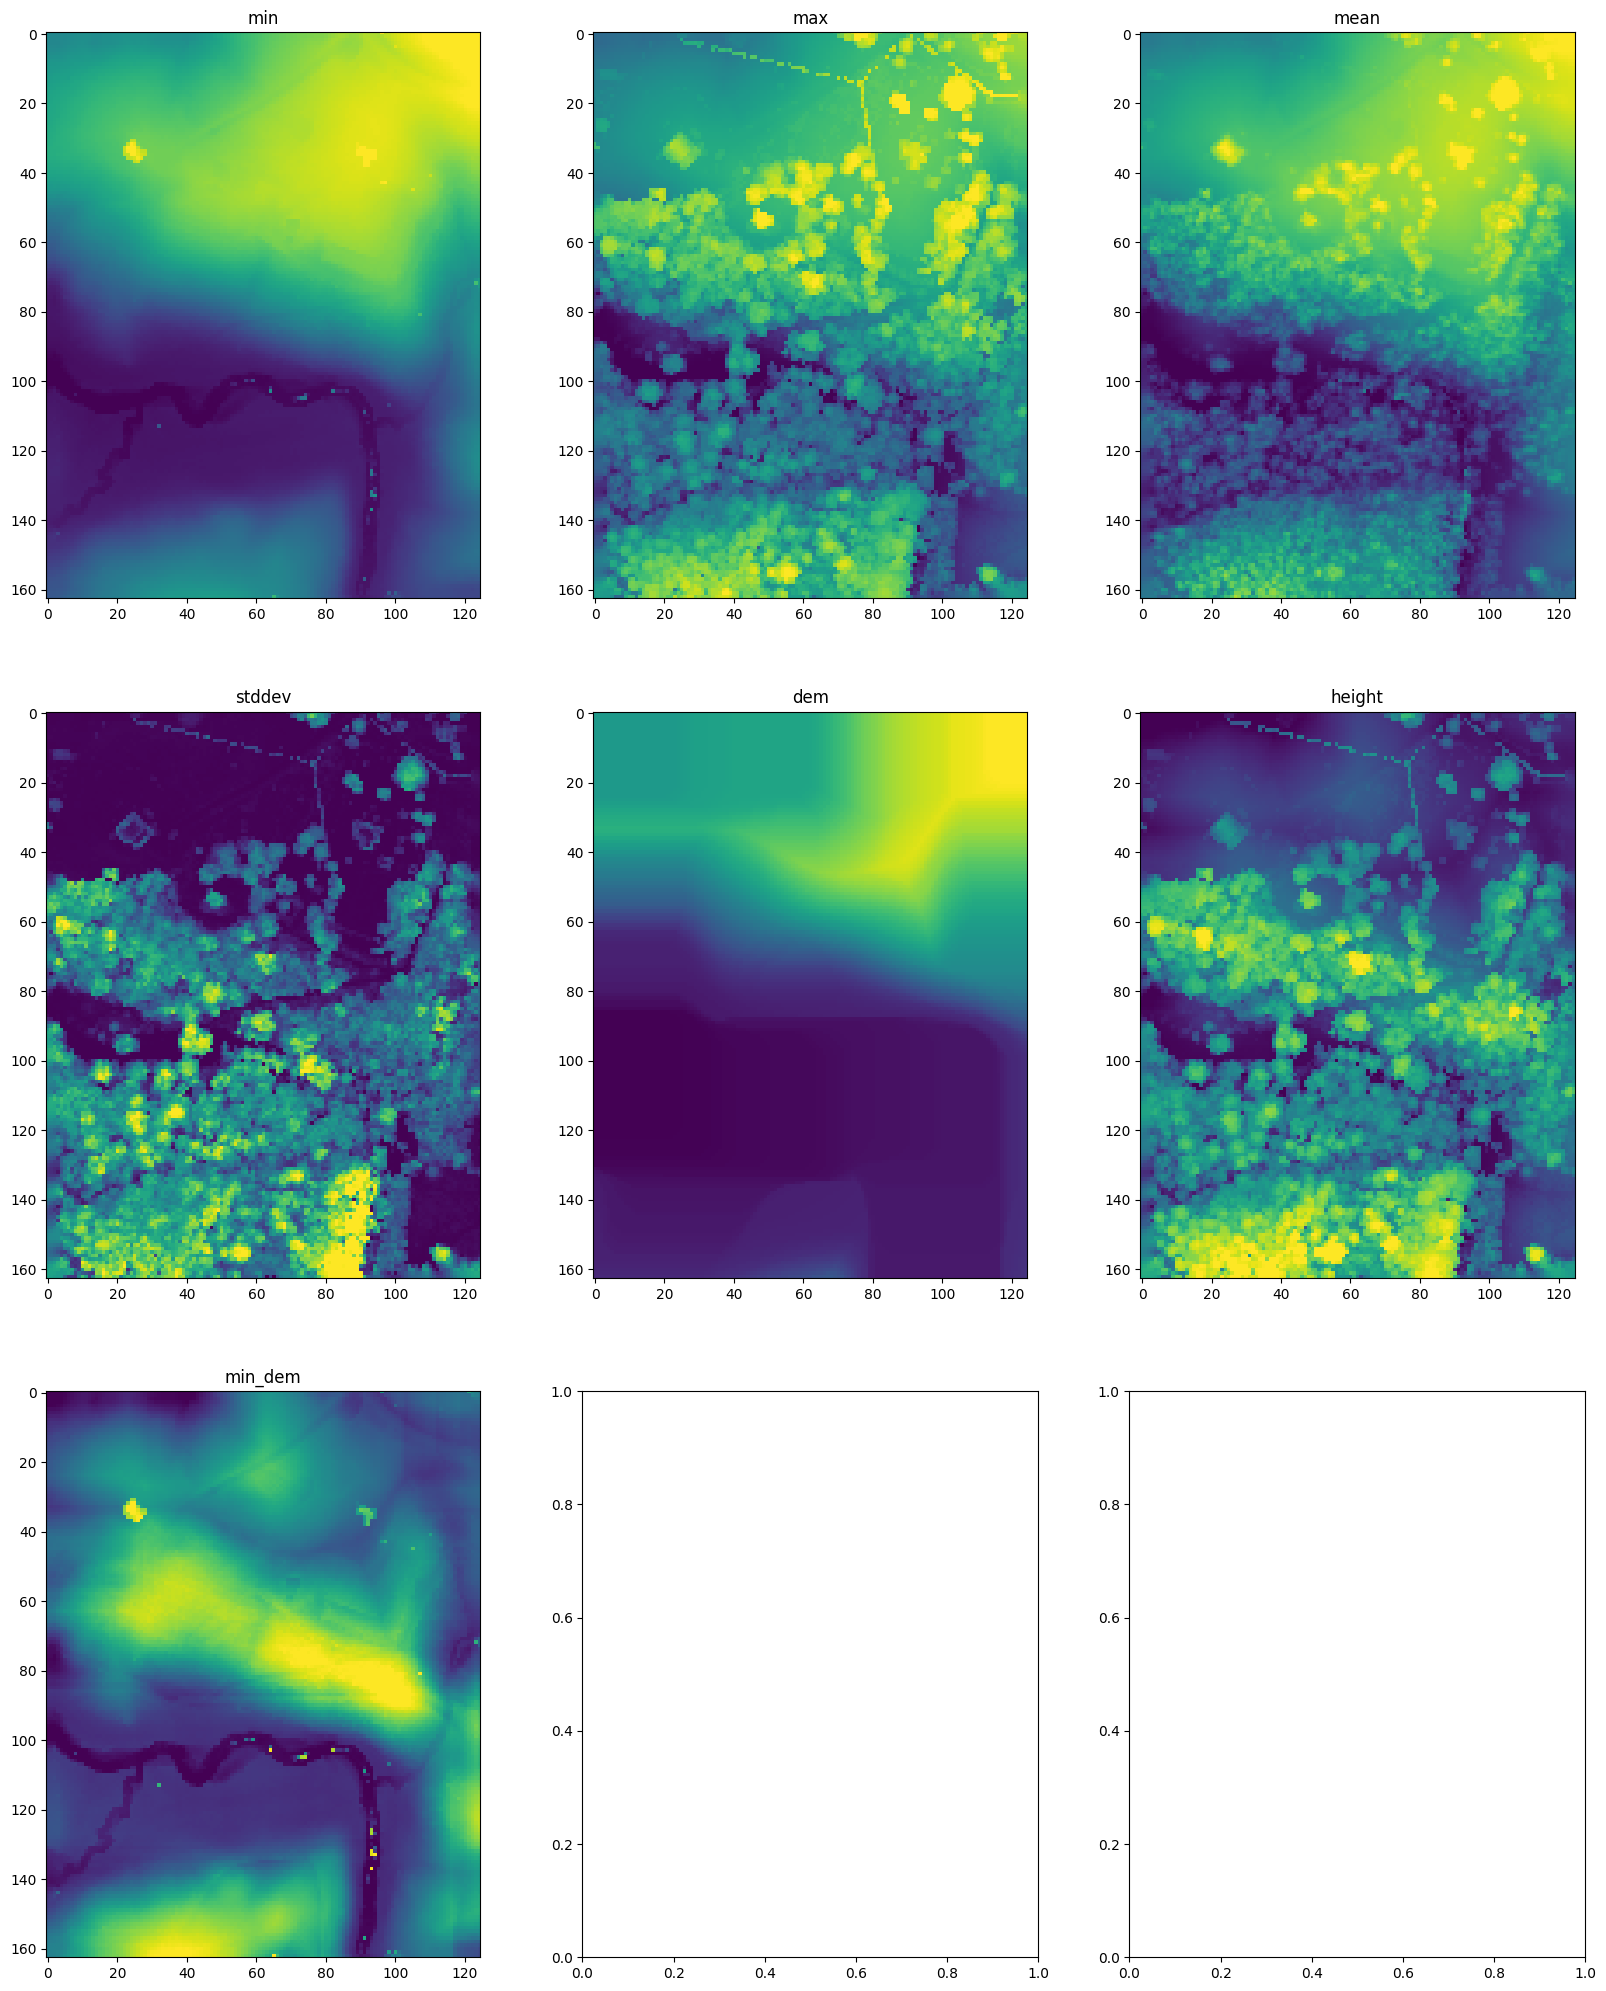

In [15]:
nRows = int(np.ceil(ldr.nFeatures/3))
matplotlib.rcParams['figure.figsize'] = (20,25)
fig, axs = plt.subplots(nRows, 3)
for idx,ax in enumerate(axs.ravel()):
    if idx < ldr.nFeatures:
        ax.imshow(stretch(ldr.features[idx]));
        ax.set_title(ldr.feature_names[idx])

In [16]:
for fname in ['./USGS_LPC_VA_ChesapeakeBay_2015_LAS_S13_4993_30.laz',
                './USGS_LPC_VA_ChesapeakeBay_2015_LAS_S13_4990_20.laz']:
    ldr = ld.lidar(fname)
    ldr.save_pngs('image_chips/'+fname[2:-4])
    ldr.save_tiffs('image_chips/'+fname[2:-4])